In [1]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader  
from skimage import io

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Experiment 3

In [4]:
!unzip "/content/drive/MyDrive/SoftComputingLab/ASS_2/Dataset_2.zip"

Archive:  /content/drive/MyDrive/SoftComputingLab/ASS_2/Dataset_2.zip
   creating: Dataset_2/
  inflating: Dataset_2/t10k-images-idx3-ubyte  
  inflating: Dataset_2/t10k-labels-idx1-ubyte  
  inflating: Dataset_2/train-images-idx3-ubyte  
  inflating: Dataset_2/train-labels-idx1-ubyte  
  inflating: Dataset_2/verification_test.csv  
  inflating: Dataset_2/verification_train.csv  


In [5]:
train_csv2  = pd.read_csv('/content/Dataset_2/verification_train.csv')
test_csv2 = pd.read_csv('/content/Dataset_2/verification_test.csv')

In [6]:
import numpy as np
class second_Dataset(Dataset):
    """User defined class to build a datset using Pytorch class Dataset."""
    
    def __init__(self, data, transform = None):
        """Method to initilaize variables.""" 
        self.data_MNIST = list(data.values)
        self.transform = transform
        
        label = []
        image = []
        
        for i in self.data_MNIST:
             # first column is of labels.
            label.append(i[0])
            image.append(i[1:])
        self.labels = np.asarray(label)
        self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')

    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]
        
        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)

In [7]:
train_set = second_Dataset(train_csv2, transform=transforms.Compose([transforms.ToTensor()]))
test_set = second_Dataset(test_csv2, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(train_set, batch_size=100)

For experiment 1

In [8]:
print(len(train_set))
print(len(test_set))

60000
10000


In [9]:
# Hyperparameters

batch_size = 20
num_iters = 20000
input_dim = 28*28 # num_features = 784
num_hidden = 200 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)





class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_3(out)
        
        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_5(out)
        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_6(out)
     
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
iteration_loss= []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6891279816627502. Accuracy: 74.4
Iteration: 1000. Loss: 0.5077216625213623. Accuracy: 80.8
Iteration: 1500. Loss: 0.33847030997276306. Accuracy: 83.85
Iteration: 2000. Loss: 0.4402025640010834. Accuracy: 81.92
Iteration: 2500. Loss: 0.09167042374610901. Accuracy: 81.91
Iteration: 3000. Loss: 0.30736061930656433. Accuracy: 82.27
Iteration: 3500. Loss: 0.6872134804725647. Accuracy: 84.8
Iteration: 4000. Loss: 0.48154550790786743. Accuracy: 85.97
Iteration: 4500. Loss: 0.30011242628097534. Accuracy: 85.48
Iteration: 5000. Loss: 0.7749454379081726. Accuracy: 86.0
Iteration: 5500. Loss: 0.6040371060371399. Accuracy: 85.07
Iteration: 6000. Loss: 0.7104323506355286. Accuracy: 86.16
Iteration: 6500. Loss: 0.37528640031814575. Accuracy: 82.96
Iteration: 7000. Loss: 0.2987636923789978. Accuracy: 86.89
Iteration: 7500. Loss: 0.7708823084831238. Accuracy: 86.26
Iteration: 8000. Loss: 0.28419169783592224. Accuracy: 86.73
Iteration: 8500. Loss: 0.6671302318572998. Accuracy: 8

[0.6891279816627502, 0.5077216625213623, 0.33847030997276306, 0.4402025640010834, 0.09167042374610901, 0.30736061930656433, 0.6872134804725647, 0.48154550790786743, 0.30011242628097534, 0.7749454379081726, 0.6040371060371399, 0.7104323506355286, 0.37528640031814575, 0.2987636923789978, 0.7708823084831238, 0.28419169783592224, 0.6671302318572998, 0.8046510815620422, 0.23747801780700684, 0.1307486593723297, 0.29823651909828186, 0.41326457262039185, 0.4735468029975891, 0.4838947355747223, 0.47272437810897827, 0.4615335464477539, 0.196505606174469, 0.16692253947257996, 0.14346268773078918, 0.2310362160205841, 0.49255743622779846, 0.38790786266326904, 0.6087489128112793, 0.37649741768836975, 0.1510678231716156, 0.15614920854568481]


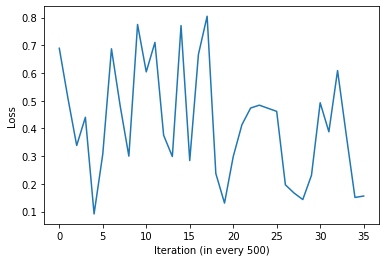

In [10]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

For experiment 2

In [11]:
# Hyperparameters

#Batch Parameters
batch_size = 250
num_iters = 20000
input_dim = 28*28
num_hidden = 400
output_dim = 10

learning_rate = 0.01

num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



'''
MAKING DATASET ITERABLE
'''

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()

       #First Hidden Layer
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()

        #2nd Hidden Layer
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()

         #3rd Hidden Layer
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.Softmax(dim=0)

         #4th Hidden Layer
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.Softmax(dim=0)

         #5th Hidden Layer
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.Tanh()
        
        #6th Hidden Layer
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.Tanh()

        #7th Hidden Layer
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        self.relu_7 = nn.Tanh()

 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)

        out  = self.linear_7(out)
        out = self.relu_7(out)

        
        
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

83
Iteration: 500. Loss: 2.3026936054229736. Accuracy: 10.0
Iteration: 1000. Loss: 2.3026859760284424. Accuracy: 10.0
Iteration: 1500. Loss: 2.3024799823760986. Accuracy: 10.0
Iteration: 2000. Loss: 2.30269455909729. Accuracy: 10.0
Iteration: 2500. Loss: 2.3030202388763428. Accuracy: 10.0
Iteration: 3000. Loss: 2.3024885654449463. Accuracy: 10.0
Iteration: 3500. Loss: 2.302645683288574. Accuracy: 10.0
Iteration: 4000. Loss: 2.302521228790283. Accuracy: 10.0
Iteration: 4500. Loss: 2.3025474548339844. Accuracy: 10.0
Iteration: 5000. Loss: 2.302565574645996. Accuracy: 10.0
Iteration: 5500. Loss: 2.302513599395752. Accuracy: 10.0
Iteration: 6000. Loss: 2.3026254177093506. Accuracy: 10.0
Iteration: 6500. Loss: 2.302584171295166. Accuracy: 10.0
Iteration: 7000. Loss: 2.3025777339935303. Accuracy: 10.0
Iteration: 7500. Loss: 2.3022823333740234. Accuracy: 10.0
Iteration: 8000. Loss: 2.3025662899017334. Accuracy: 10.0
Iteration: 8500. Loss: 2.302644729614258. Accuracy: 10.0
Iteration: 9000. Los

[2.3026936054229736, 2.3026859760284424, 2.3024799823760986, 2.30269455909729, 2.3030202388763428, 2.3024885654449463, 2.302645683288574, 2.302521228790283, 2.3025474548339844, 2.302565574645996, 2.302513599395752, 2.3026254177093506, 2.302584171295166, 2.3025777339935303, 2.3022823333740234, 2.3025662899017334, 2.302644729614258, 2.3025872707366943, 2.302661895751953, 2.3026955127716064, 2.3027572631835938, 2.302652359008789, 2.3026483058929443, 2.3026435375213623, 2.3028507232666016, 2.302539110183716, 2.302523136138916, 2.3027870655059814, 2.302457332611084, 2.302737236022949, 2.3027193546295166, 2.3026282787323, 2.302381992340088, 2.302448272705078, 2.302622079849243, 2.3027243614196777, 2.302677869796753, 2.3027231693267822, 2.3023533821105957]


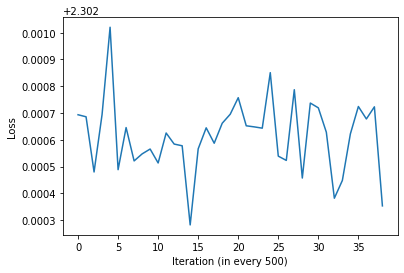

In [12]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()